<a href="https://colab.research.google.com/github/AkhithaBabu/Time-Series-Analysis/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Time Series Analysis

## [1. Dates & Times](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=Ve58Jo5uiuMJ)

## [2. Time Zone Handling](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=X7KXB6f7jd35&line=1&uniqifier=1)

## [3. Reading in data and making sensible data frames](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=kAtdN-xTjyLv&line=1&uniqifier=1)

## [4. Resampling](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=jIfqZVYakElq&line=1&uniqifier=1)

## [5. Moving Window Functions](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=zIVlI1bBkXx5&line=1&uniqifier=1)

In [ ]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

from pytz import common_timezones, all_timezones
import timeit

# 1. Dates & Times

* [Generate series of TIMES](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=z6YFd1LQiuMK)

* [Different formats](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=aXjnxmq5iuMm&line=7&uniqifier=1)

* [TIME STAMPS](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=v8dEHyZziuMt)

* [TIME SPANS](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=FMfiG4jAiuNB)

* [Time offset](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=dW9zAXqtiuNV)

* [FANCY FREQUENCY SETTING](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=_mjNmDUdiuNf&line=1&uniqifier=1)

* [INDEXING WITH TIME OBJECTS](https://colab.research.google.com/drive/1Nd7VvHg0kXIj0K0RPiBOCunbt7vfihDh#scrollTo=f3nErhdTsgsD&line=1&uniqifier=1)

## Generate series of TIMES

In [ ]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D') # D-days
rng

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'M') # M-months
rng

DatetimeIndex(['2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'Y') # Y-year
rng

DatetimeIndex(['2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [ ]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'H') # H-hour
rng

DatetimeIndex(['2016-07-01 00:00:00', '2016-07-01 01:00:00',
               '2016-07-01 02:00:00', '2016-07-01 03:00:00',
               '2016-07-01 04:00:00', '2016-07-01 05:00:00',
               '2016-07-01 06:00:00', '2016-07-01 07:00:00',
               '2016-07-01 08:00:00', '2016-07-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
rng = pd.date_range(start='2016 Jul 1', end='2018 Jul 1', freq = '8H') # Given start and end; freq=8 hours
rng

DatetimeIndex(['2016-07-01 00:00:00', '2016-07-01 08:00:00',
               '2016-07-01 16:00:00', '2016-07-02 00:00:00',
               '2016-07-02 08:00:00', '2016-07-02 16:00:00',
               '2016-07-03 00:00:00', '2016-07-03 08:00:00',
               '2016-07-03 16:00:00', '2016-07-04 00:00:00',
               ...
               '2018-06-28 00:00:00', '2018-06-28 08:00:00',
               '2018-06-28 16:00:00', '2018-06-29 00:00:00',
               '2018-06-29 08:00:00', '2018-06-29 16:00:00',
               '2018-06-30 00:00:00', '2018-06-30 08:00:00',
               '2018-06-30 16:00:00', '2018-07-01 00:00:00'],
              dtype='datetime64[ns]', length=2191, freq='8H')

In [ ]:
rng = pd.date_range(end='2018 Jul 1', periods = 10, freq = '8H') # Given  end and period
rng

DatetimeIndex(['2018-06-28 00:00:00', '2018-06-28 08:00:00',
               '2018-06-28 16:00:00', '2018-06-29 00:00:00',
               '2018-06-29 08:00:00', '2018-06-29 16:00:00',
               '2018-06-30 00:00:00', '2018-06-30 08:00:00',
               '2018-06-30 16:00:00', '2018-07-01 00:00:00'],
              dtype='datetime64[ns]', freq='8H')

In [ ]:
rng = pd.date_range(start='2018 Jul 1', periods = 10, freq = '8H') # Given  end and period
rng

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 08:00:00',
               '2018-07-01 16:00:00', '2018-07-02 00:00:00',
               '2018-07-02 08:00:00', '2018-07-02 16:00:00',
               '2018-07-03 00:00:00', '2018-07-03 08:00:00',
               '2018-07-03 16:00:00', '2018-07-04 00:00:00'],
              dtype='datetime64[ns]', freq='8H')

In [ ]:
rng = pd.date_range(end='2018 Jul 1', periods = 10, freq = '-8H') # Given  end and period
rng

DatetimeIndex(['2018-07-04 00:00:00', '2018-07-03 16:00:00',
               '2018-07-03 08:00:00', '2018-07-03 00:00:00',
               '2018-07-02 16:00:00', '2018-07-02 08:00:00',
               '2018-07-02 00:00:00', '2018-07-01 16:00:00',
               '2018-07-01 08:00:00', '2018-07-01 00:00:00'],
              dtype='datetime64[ns]', freq='-8H')

In [ ]:
rng = pd.date_range(start='2018 Jul 1', periods = 10, freq = '8H',tz="Asia/Hong_Kong") # time zone
rng

DatetimeIndex(['2018-07-01 00:00:00+08:00', '2018-07-01 08:00:00+08:00',
               '2018-07-01 16:00:00+08:00', '2018-07-02 00:00:00+08:00',
               '2018-07-02 08:00:00+08:00', '2018-07-02 16:00:00+08:00',
               '2018-07-03 00:00:00+08:00', '2018-07-03 08:00:00+08:00',
               '2018-07-03 16:00:00+08:00', '2018-07-04 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='8H')

In [ ]:
rng = pd.date_range(start='2018 Jul 1', periods = 10, freq = '8H',tz="Asia/Hong_Kong", normalize=True) #normalize
rng

DatetimeIndex(['2018-07-01 00:00:00+08:00', '2018-07-01 08:00:00+08:00',
               '2018-07-01 16:00:00+08:00', '2018-07-02 00:00:00+08:00',
               '2018-07-02 08:00:00+08:00', '2018-07-02 16:00:00+08:00',
               '2018-07-03 00:00:00+08:00', '2018-07-03 08:00:00+08:00',
               '2018-07-03 16:00:00+08:00', '2018-07-04 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', freq='8H')

## Different formats

* 2016 Jul 1
* 7/1/2016
* July 1, 2016
* 2016-07-01
* 2016/07/01

## TIME STAMPS


In [ ]:
pd.Timestamp('2016-07-10') # Date

Timestamp('2016-07-10 00:00:00')

In [ ]:
pd.Timestamp('2016-07-10 10') # Date with time # hr

Timestamp('2016-07-10 10:00:00')

In [ ]:
pd.Timestamp('2016-07-10 10:15.56586946547999') # Date with time # hr,min,sec,....

Timestamp('2016-07-10 10:15:33')

[Some properties of timestamps](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) #time-date-components

In [ ]:
t = pd.Timestamp('2016-07-10 10:15')
t.quarter

3

In [ ]:
t.dayofweek

6

## TIME SPANS

In [ ]:
pd.Period('2016-01')

Period('2016-01', 'M')

In [ ]:
pd.Period('2016-01-01')

Period('2016-01-01', 'D')

In [ ]:
pd.Period('2016-01-01 10')

Period('2016-01-01 10:00', 'H')

In [ ]:
pd.Period('2016-01-01 10:10')

Period('2016-01-01 10:10', 'T')

In [ ]:
pd.Period('2016-01-01 10:10:10')

Period('2016-01-01 10:10:10', 'S')

To multiple time periods, look for analogy with ```pd.date_range()``` above

## Time offset

In [ ]:
pd.Timedelta('1 day')

Timedelta('1 days 00:00:00')

In [ ]:
pd.Period('2016-01-01 10:10') + pd.Timedelta('1 day')

Period('2016-01-02 10:10', 'T')

In [ ]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('1 day')

Timestamp('2016-01-02 10:10:00')

In [ ]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('15 ns')

Timestamp('2016-01-01 10:10:00.000000015')

## FANCY FREQUENCY SETTING

In [ ]:
pd.period_range('2016-01-01 10:10', freq = 'B', periods = 10) # business days

PeriodIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
             '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
             '2016-01-13', '2016-01-14'],
            dtype='period[B]', freq='B')

### [Combine Frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) 

What if you want to advance by 25 hours each day?

In [ ]:
# Method 1
p1 = pd.period_range('2016-01-01 10:10', freq = '25H', periods = 10)
p1

PeriodIndex(['2016-01-01 10:00', '2016-01-02 11:00', '2016-01-03 12:00',
             '2016-01-04 13:00', '2016-01-05 14:00', '2016-01-06 15:00',
             '2016-01-07 16:00', '2016-01-08 17:00', '2016-01-09 18:00',
             '2016-01-10 19:00'],
            dtype='period[25H]', freq='25H')

In [ ]:
# Method 1
p2 = pd.period_range('2016-01-01 10:10', freq = '1D1H', periods = 10)
p2

PeriodIndex(['2016-01-01 10:00', '2016-01-02 11:00', '2016-01-03 12:00',
             '2016-01-04 13:00', '2016-01-05 14:00', '2016-01-06 15:00',
             '2016-01-07 16:00', '2016-01-08 17:00', '2016-01-09 18:00',
             '2016-01-10 19:00'],
            dtype='period[25H]', freq='25H')

## INDEXING WITH TIME OBJECTS

In [ ]:
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D') # using a date range as above
pd.Series(range(len(rng)), index = rng)

2016-07-01    0
2016-07-02    1
2016-07-03    2
2016-07-04    3
2016-07-05    4
2016-07-06    5
2016-07-07    6
2016-07-08    7
2016-07-09    8
2016-07-10    9
Freq: D, dtype: int64

In [ ]:
periods = [pd.Period('2016-01'), pd.Period('2016-02'), pd.Period('2016-03')] # time period indices # index as a time span rather than a single point in time
ts = pd.Series(np.random.randn(len(periods)), index = periods)
ts

2016-01    0.397830
2016-02   -0.633915
2016-03    1.084826
Freq: M, dtype: float64

In [ ]:
type(ts.index)

pandas.core.indexes.period.PeriodIndex

In [ ]:
ts['2016']

2016-01    0.397830
2016-02   -0.633915
2016-03    1.084826
Freq: M, dtype: float64

In [ ]:
# Timestamped data can be convereted to period indices with to_period and vice versa with to_timestamp
ts = pd.Series(range(10), pd.date_range('07-10-16 8:00', periods = 10, freq = 'H'))
ts

2016-07-10 08:00:00    0
2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
2016-07-10 12:00:00    4
2016-07-10 13:00:00    5
2016-07-10 14:00:00    6
2016-07-10 15:00:00    7
2016-07-10 16:00:00    8
2016-07-10 17:00:00    9
Freq: H, dtype: int64

In [ ]:
ts_period = ts.to_period() # Timestamped data convereted to period indices with to_period
ts_period

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
2016-07-10 12:00    4
2016-07-10 13:00    5
2016-07-10 14:00    6
2016-07-10 15:00    7
2016-07-10 16:00    8
2016-07-10 17:00    9
Freq: H, dtype: int64

In [ ]:
ts_period['2016-07-10 08:30':'2016-07-10 11:45'] # the concept of overlap with time periods

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
Freq: H, dtype: int64

In [ ]:
ts['2016-07-10 08:30':'2016-07-10 11:45'] # the concept of include with timestamps

2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
Freq: H, dtype: int64

# 2. Time Zone Handling

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods = 15, freq = 'D')
rng.tz

In [ ]:
rng_tz = pd.date_range('3/6/2012 00:00', periods = 15, freq = 'D', tz = 'Europe/London')
rng_tz.tz

<DstTzInfo 'Europe/London' LMT-1 day, 23:59:00 STD>

In [ ]:
print(len(common_timezones))
print(len(all_timezones))
print(set(all_timezones) - set(common_timezones))

440
592
{'America/Santa_Isabel', 'Etc/GMT+5', 'Atlantic/Faeroe', 'Asia/Dacca', 'PST8PDT', 'Europe/Tiraspol', 'MET', 'Etc/GMT+1', 'Asia/Chongqing', 'Jamaica', 'Chile/EasterIsland', 'HST', 'Europe/Belfast', 'Mexico/General', 'Antarctica/South_Pole', 'Etc/GMT+10', 'Etc/GMT', 'Etc/GMT-10', 'Etc/GMT-13', 'Turkey', 'Australia/West', 'Atlantic/Jan_Mayen', 'Australia/Canberra', 'Asia/Saigon', 'US/Aleutian', 'America/Cordoba', 'Etc/GMT-1', 'Japan', 'Africa/Asmera', 'Etc/UCT', 'Australia/LHI', 'Brazil/West', 'America/Catamarca', 'Etc/GMT-14', 'GMT-0', 'Etc/Universal', 'Pacific/Johnston', 'Pacific/Ponape', 'Etc/GMT-12', 'Portugal', 'Universal', 'Asia/Tel_Aviv', 'Etc/GMT-11', 'Hongkong', 'Pacific/Truk', 'Asia/Calcutta', 'US/Samoa', 'America/Virgin', 'America/Porto_Acre', 'GB', 'Etc/GMT+7', 'America/Mendoza', 'Navajo', 'Etc/GMT+12', 'Cuba', 'Etc/UTC', 'America/Rosario', 'America/Buenos_Aires', 'Etc/GMT-8', 'Etc/GMT-2', 'Mexico/BajaSur', 'Asia/Istanbul', 'America/Knox_IN', 'Greenwich', 'America/Ense

In [ ]:
t_naive = pd.Timestamp('2016-07-10 08:50') # localize a naive timestamp
t_naive

Timestamp('2016-07-10 08:50:00')

In [ ]:
t = t_naive.tz_localize(tz = 'US/Central')
t

Timestamp('2016-07-10 08:50:00-0500', tz='US/Central')

In [ ]:
t.tz_convert('Asia/Tokyo')

Timestamp('2016-07-10 22:50:00+0900', tz='Asia/Tokyo')

In [ ]:
# handle daylight savings
rng = pd.date_range('2016-03-10', periods=10, tz='US/Central')
ts = pd.Series(range(10), index=rng)
ts

2016-03-10 00:00:00-06:00    0
2016-03-11 00:00:00-06:00    1
2016-03-12 00:00:00-06:00    2
2016-03-13 00:00:00-06:00    3
2016-03-14 00:00:00-05:00    4
2016-03-15 00:00:00-05:00    5
2016-03-16 00:00:00-05:00    6
2016-03-17 00:00:00-05:00    7
2016-03-18 00:00:00-05:00    8
2016-03-19 00:00:00-05:00    9
Freq: D, dtype: int64

In [ ]:
rng = pd.date_range('2016-03-10', periods=10, tz='utc')
ts = pd.Series(range(10), index=rng)
ts

2016-03-10 00:00:00+00:00    0
2016-03-11 00:00:00+00:00    1
2016-03-12 00:00:00+00:00    2
2016-03-13 00:00:00+00:00    3
2016-03-14 00:00:00+00:00    4
2016-03-15 00:00:00+00:00    5
2016-03-16 00:00:00+00:00    6
2016-03-17 00:00:00+00:00    7
2016-03-18 00:00:00+00:00    8
2016-03-19 00:00:00+00:00    9
Freq: D, dtype: int64

In [ ]:
ts.tz_convert('US/Central')

2016-03-09 18:00:00-06:00    0
2016-03-10 18:00:00-06:00    1
2016-03-11 18:00:00-06:00    2
2016-03-12 18:00:00-06:00    3
2016-03-13 19:00:00-05:00    4
2016-03-14 19:00:00-05:00    5
2016-03-15 19:00:00-05:00    6
2016-03-16 19:00:00-05:00    7
2016-03-17 19:00:00-05:00    8
2016-03-18 19:00:00-05:00    9
Freq: D, dtype: int64

In [ ]:
pd.date_range('03-12-2016 22:00', periods = 12, freq = 'H', tz = 'US/Eastern')

DatetimeIndex(['2016-03-12 22:00:00-05:00', '2016-03-12 23:00:00-05:00',
               '2016-03-13 00:00:00-05:00', '2016-03-13 01:00:00-05:00',
               '2016-03-13 03:00:00-04:00', '2016-03-13 04:00:00-04:00',
               '2016-03-13 05:00:00-04:00', '2016-03-13 06:00:00-04:00',
               '2016-03-13 07:00:00-04:00', '2016-03-13 08:00:00-04:00',
               '2016-03-13 09:00:00-04:00', '2016-03-13 10:00:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', freq='H')

#3. Reading in data and making sensible data frames

In [ ]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [ ]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [ ]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [ ]:
data['1950':'1952'] # the range of dates

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [ ]:
# ?the empirical range of dates

# ?visualize


type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
data['1951-11-11':'1951-11-12']

,value
month,


In [ ]:
data_pd = data.to_period() # a period index
data_pd

,value
month,
1950-01,-0.060310
1950-02,0.626810
1950-03,-0.008128
1950-04,0.555100
1950-05,0.071577
...,...
2020-05,-0.027055
2020-06,-0.121800
2020-07,-0.411820


In [ ]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [ ]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


### various data loads

In [ ]:
print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

infer_datetime_format = True, no date parser
10 loops, best of 3: 141 ms per loop


In [ ]:
print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

infer_datetime_format = False, no date parser
10 loops, best of 3: 141 ms per loop


In [ ]:
print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

infer_datetime_format = True, date parser provided


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


10 loops, best of 3: 158 ms per loop


In [ ]:
print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = False, date parser provided


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


10 loops, best of 3: 154 ms per loop


### already have the data frame and want to parse columns

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [ ]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

[To get your own time series data, load it in, and see what you can see](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)

1. plot 
2. get range of dates 
3. convert between time and period index

In [ ]:
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10)) # truncate convenience function
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [ ]:
ts[[0, 2, 6]].index # truncate in a way that breaks frequency

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

# 4. Resampling

In [ ]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
converted = ts.asfreq('45Min', method='pad')
converted 

2011-01-01 00:00:00    1.306015
2011-01-01 00:45:00    1.306015
2011-01-01 01:30:00    0.651316
2011-01-01 02:15:00   -1.239611
2011-01-01 03:00:00    0.227937
                         ...   
2011-01-03 19:30:00    0.347187
2011-01-03 20:15:00   -0.206290
2011-01-03 21:00:00    0.640607
2011-01-03 21:45:00    0.640607
2011-01-03 22:30:00    1.654701
Freq: 45T, Length: 95, dtype: float64

Does ```asfreq``` change the # of rows?

different methods : {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}

 Might any of these methods have pitfalls from a logical point of view?

What's the difference between going to a higher frequency and a lower frequency?

In [ ]:
converted = ts.asfreq('90Min', method = 'bfill')
converted 

2011-01-01 00:00:00    1.306015
2011-01-01 01:30:00   -1.239611
2011-01-01 03:00:00    0.227937
2011-01-01 04:30:00   -1.360044
2011-01-01 06:00:00    1.612312
2011-01-01 07:30:00    1.126650
2011-01-01 09:00:00   -0.332976
2011-01-01 10:30:00   -0.262672
2011-01-01 12:00:00    1.263511
2011-01-01 13:30:00   -0.320728
2011-01-01 15:00:00   -0.231056
2011-01-01 16:30:00   -0.473676
2011-01-01 18:00:00   -0.431423
2011-01-01 19:30:00   -1.258667
2011-01-01 21:00:00    0.590661
2011-01-01 22:30:00   -0.045003
2011-01-02 00:00:00    0.945894
2011-01-02 01:30:00    0.496870
2011-01-02 03:00:00    0.613074
2011-01-02 04:30:00    0.224664
2011-01-02 06:00:00   -0.422294
2011-01-02 07:30:00    0.064792
2011-01-02 09:00:00   -0.308277
2011-01-02 10:30:00    0.118639
2011-01-02 12:00:00   -0.763523
2011-01-02 13:30:00   -0.593053
2011-01-02 15:00:00   -0.489882
2011-01-02 16:30:00   -0.955651
2011-01-02 18:00:00    0.835187
2011-01-02 19:30:00    0.549855
2011-01-02 21:00:00    0.010503
2011-01-

What's different logically about going to a higher frequency vs a lower frequency? 

What do you want to do when switching to a lower freqeuncy that is not logical when switching to a higher frequency?

In [ ]:
ts.resample('D').sum()

2011-01-01    1.829627
2011-01-02    3.420279
2011-01-03   -4.699662
Freq: D, dtype: float64

 What if you want to downsample and you don't want to ```ffill``` or ```bfill```?

 What is the difference between ```.resample()``` and ```.asfreq()```?

What are some special things you can do with ```.resample()``` you can't do with ```.asfreq()```?


# 5. Moving Window Functions

### Window functions are like aggregation functions


You can use them in conjunction with ```.resample()``` which will soon be a deferred operation


In [ ]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,-0.856902,0.357436,-0.811409
2016-07-01 00:00:01,0.197360,0.076208,0.650243
2016-07-01 00:00:02,-0.442275,-0.982491,0.224638
2016-07-01 00:00:03,-0.677867,-0.396579,0.463378
2016-07-01 00:00:04,1.491610,0.088416,-0.923034


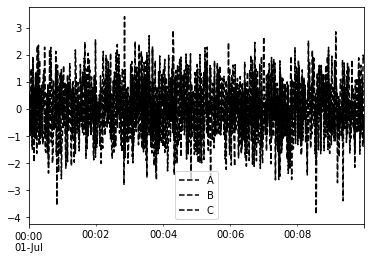

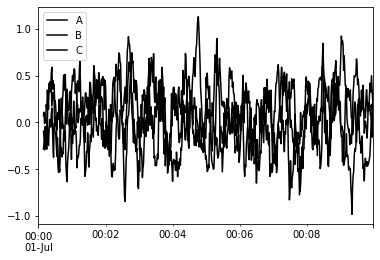

In [ ]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [ ]:
pd.ewma(df, span = 15, min_periods = 2)[1:10] #exponentially weighted

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D']) # plot a rolling average per column
df.head()

,A,B,C,D
2016-06-06,-0.550677,-0.799710,-0.756205,1.289021
2016-06-07,0.727326,-0.242248,0.336750,-0.447278
2016-06-08,-0.181398,-0.294034,-0.849502,0.991810
2016-06-09,0.003624,-1.541650,-0.820736,-0.126030
2016-06-10,-1.240472,0.161594,0.064091,0.453236


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad15758d30>,
      dtype=object)

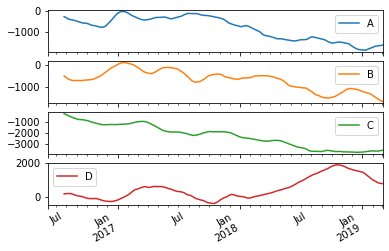

In [ ]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean()) # a custom function

In [ ]:
df.expanding(min_periods = 1).mean()[1:5] # Expanding windows # Yields the value of the statistic with all the data available up to that point in time

,A,B,C,D
2016-06-07,-0.187014,-0.920834,-0.587830,1.065382
2016-06-08,-0.126259,-1.059220,-0.814872,1.321439
2016-06-09,-0.094975,-1.513825,-1.133577,1.417960
2016-06-10,-0.324300,-1.754269,-1.311982,1.566519


Will an expanding window provide a more or less stable statistic than a rolling statistic? 

When might one vs. the other be appropriate?

[EWMA](pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate
)

Why use EWMA?

Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting